In [1]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import torch
import torch.utils.data as data
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda")


with open('./learning_dataset.csv', newline='') as f:
#with open('./Dataset_separated/EbN0_80_learning.csv', newline='') as f:
    reader = csv.reader(f)
    dataset = list(reader)
f.close()    
dataset = dataset[1:len(dataset)]

In [2]:
sample_size = 10000
test_dataset = random.sample(dataset, sample_size)
train_dataset = random.sample(dataset, sample_size)

#test_dataset = torch.tensor(np.array(list(np.float_(test_dataset)))).to(device)
#train_dataset = torch.tensor(np.array(list(np.float_(train_dataset)))).to(device)

#test_datset= torch.from_numpy(list(np.float_(test_dataset)))
#train_dataset = torch.from_numpy(list(np.float_(train_dataset)))

In [3]:
m =nn.ReLU()
#m = nn.LeakyReLU(0.1)
hidden = 8
class mlp(nn.Module):
    def __init__(self):
        super(mlp, self).__init__()
        self.fc1 = nn.Linear(3,hidden)
        self.fc2 = nn.Linear(hidden,hidden)
        self.fc3 = nn.Linear(hidden,hidden)
#         self.fc4 = nn.Linear(hidden,hidden)
#         self.fc5 = nn.Linear(hidden,hidden)
#         self.fc6 = nn.Linear(hidden,hidden)
        self.fc7 = nn.Linear(hidden,1)
    def forward(self, x):
        x = x.float()

        x = m(self.fc1(x))
        x = m(self.fc2(x))
        x = m(self.fc3(x))
#         x = m(self.fc4(x))
#         x = m(self.fc5(x))
#         x = m(self.fc6(x))
        x = m(self.fc7(x))
    
        #return F.log_softmax(h4, dim=1)
        return x


19900 / 20000   Loss :  1.8471870422363281


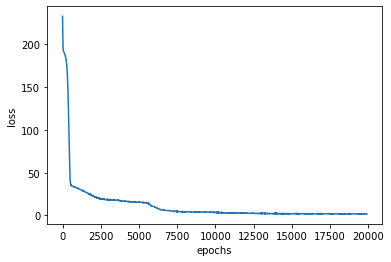

In [4]:
#batch_size = 64

#epochs = 100000
epochs = 20000
lr = 0.001
momentum =0.5

model=mlp().to(device)

#loading_model = "./output/model.pth"
#model = torch.load(loading_model)

#optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
optimizer = optim.Adam(model.parameters(), lr=lr)

loss_fn = nn.MSELoss()
loss_temp = 0
total_loss = []

model.train()
for epoch in range(epochs):
    
    #xx = random.sample(test_dataset, batch_size)
#     train_dataset = random.sample(dataset, sample_size)
    xx = train_dataset
    xx = torch.tensor(np.array(list(np.float_(xx)))).to(device)
    labels = xx[:,3].float() * 100
    xx =xx[:,0:3]
    
    output = model(xx).squeeze() #Different dimension may cause wrong results of backpropagation(Something called broadcasting)
    #print(xx)
    #print(output, labels)
    loss= loss_fn(output, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #loss_temp = loss_temp + loss.item()
    total_loss.append(loss.item())
    if epoch%100 == 0:
        clear_output(wait=True)
        print(epoch,'/',epochs,'  Loss : ', loss.item())
        '''
        if epoch == 0:
            total_loss.append(loss_temp)
        else:
            total_loss.append(loss_temp/1000)
        '''
        plt.plot(total_loss)
        plt.xlabel('epochs') #(x 1000)')
        plt.ylabel('loss')
        #plt.ylim(0,1000)
        plt.show()
        loss_temp = 0
        

In [17]:
model.eval()
test_dataset= random.sample(dataset, sample_size)
with torch.no_grad():
    xx = test_dataset
    xx = torch.tensor(np.array(list(np.float_(xx)))).to(device)
    labels = xx[:,3].float() * 100
    xx =xx[:,0:3]
    
    output = model(xx).squeeze() #Different dimension may cause wrong results of backpropagation(Something called broadcasting)
    #print(xx)
    #print(output, labels)
    loss= loss_fn(output, labels)
    
    print('Test loss : ', loss.item())
        

Test loss :  1.9387933015823364


In [18]:
output

tensor([14.9362, 13.4995,  0.0000,  ...,  7.0611,  7.0100, 15.0758],
       device='cuda:0')

In [19]:
labels

tensor([13.6000, 10.5000,  0.9000,  ...,  7.5000,  7.5000, 15.7000],
       device='cuda:0')

In [8]:
savePath="./output/model_20221121_3881.pth"

torch.save(model, savePath)

In [9]:
import csv

f=open('loss_rate.csv','w',encoding='utf-8', newline='')
wr=csv.writer(f)

wr.writerow(total_loss)
#for i in range(len(total_loss)):
#    wr.writerow(total_loss[i])

370180

In [10]:
total_loss[1:4]

[231.53964233398438, 229.9023895263672, 228.17063903808594]

In [11]:
for i in range(5):
    print(i)

0
1
2
3
4
